In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

In [2]:
sas = pd.read_csv('saas.csv')

In [3]:
sas.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [4]:
sas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [5]:
sas.drop(columns = ['Customer_Id', 'Invoice_Id', 'Subscription_Type'], inplace = True)

# Assignment
Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.
    
    Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
        Simple Average
        Moving Average
        Holt's Linear Trend Model
        Based on previous year/month/etc., this is up to you.


In [6]:
sas.Month_Invoiced = pd.to_datetime(sas.Month_Invoiced)

In [7]:
sas.head()

,Month_Invoiced,Amount
0,2014-01-31,0.0
1,2014-01-31,10.0
2,2014-01-31,0.0
3,2014-01-31,0.0
4,2014-01-31,5.0


In [8]:
sas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Month_Invoiced  790458 non-null  datetime64[ns]
 1   Amount          790458 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.1 MB


In [9]:
sas.set_index('Month_Invoiced', inplace = True)

In [10]:
sas.head()

,Amount
Month_Invoiced,
2014-01-31,0.0
2014-01-31,10.0
2014-01-31,0.0
2014-01-31,0.0
2014-01-31,5.0


In [11]:
sas_m = sas.resample('M').sum()

In [12]:
sas_m.head()

,Amount
Month_Invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0


<AxesSubplot:xlabel='Month_Invoiced'>

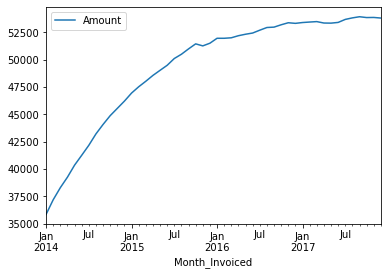

In [13]:
sas_m.plot()

In [14]:
sas_m.shape

(48, 1)

In [15]:
.6*48

28.799999999999997

In [16]:
.2*48

9.600000000000001

In [17]:
24+14+10

48

In [18]:
train = sas_m[:24]

In [19]:
validate = sas_m[24:38]

In [20]:
test = sas_m[38:49]

In [21]:
train.shape, validate.shape, test.shape

((24, 1), (14, 1), (10, 1))

In [22]:
sas_m.head()

,Amount
Month_Invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0


In [23]:
train.head()

,Amount
Month_Invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0


In [24]:
train.tail()

,Amount
Month_Invoiced,
2015-08-31,50495.0
2015-09-30,50985.0
2015-10-31,51445.0
2015-11-30,51260.0
2015-12-31,51505.0


In [25]:
validate.head()

,Amount
Month_Invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0


In [26]:
validate.tail()

,Amount
Month_Invoiced,
2016-10-31,53190.0
2016-11-30,53375.0
2016-12-31,53320.0
2017-01-31,53395.0
2017-02-28,53440.0


In [27]:
test.head()

,Amount
Month_Invoiced,
2017-03-31,53480.0
2017-04-30,53350.0
2017-05-31,53340.0
2017-06-30,53405.0
2017-07-31,53680.0


In [28]:
test.tail()

,Amount
Month_Invoiced,
2017-08-31,53820.0
2017-09-30,53925.0
2017-10-31,53850.0
2017-11-30,53860.0
2017-12-31,53805.0


In [29]:
sas_m.tail()

,Amount
Month_Invoiced,
2017-08-31,53820.0
2017-09-30,53925.0
2017-10-31,53850.0
2017-11-30,53860.0
2017-12-31,53805.0


In [30]:
# nicer way to do it:

In [31]:
pd.concat([validate.tail(1), test.head(1)])

,Amount
Month_Invoiced,
2017-02-28,53440.0
2017-03-31,53480.0


In [32]:
# Got 'em all!

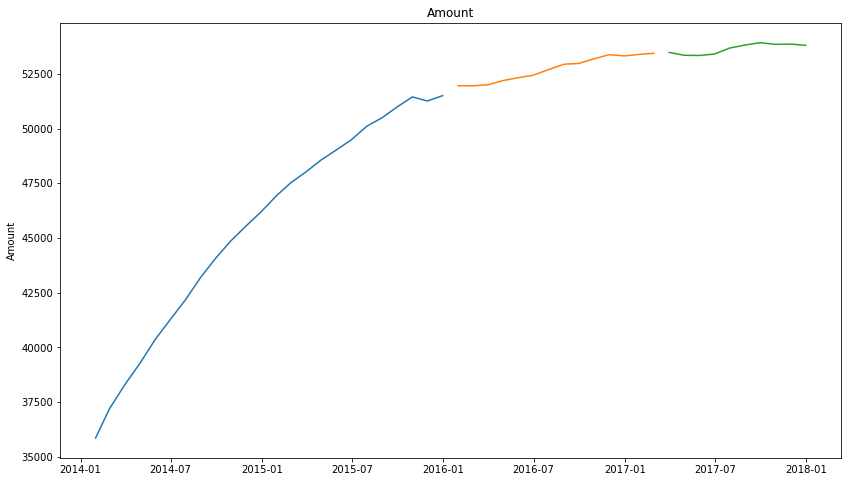

In [33]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [34]:
# I think this is a bad split, cuz it's fairly obvious that there is a pattern change at the end of train


In [35]:
# Using functions from class:

In [36]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

`plot_and_eval()` will use the evaluate function and also plot train and test values with the predicted values in order to compare performance. 

In [37]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [38]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [39]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last observed value

The simplest method for forecasting is to predict all future values to be the last observed value.  

**Make Predictions**

In [40]:
last=train['Amount'][-1:][0]
last

51505.0

In [41]:
# now compare. validate vs prediction for rmse 

In [42]:
yhat_df = pd.DataFrame(
    {'Amount': [last]},
    index=validate.index)

yhat_df.head()

,Amount
Month_Invoiced,
2016-01-31,51505.0
2016-02-29,51505.0
2016-03-31,51505.0
2016-04-30,51505.0
2016-05-31,51505.0


Amount -- RMSE: 1343


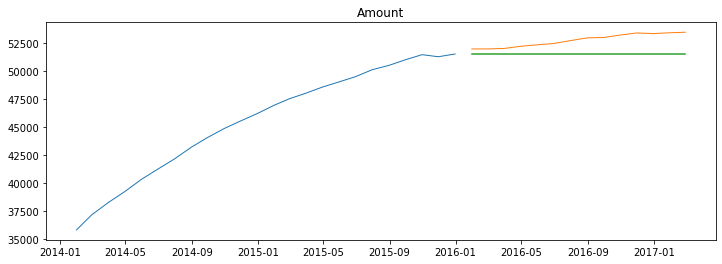

In [43]:
plot_and_eval('Amount')

In [44]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,Amount,1343.0


### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

In [45]:
# compute simple average
avgr = round(train['Amount'].mean(), 2)
avgr

45568.54

In [46]:
def make_predictions(avgr=None):
    yhat_df = pd.DataFrame({'Amount': [avgr]},
                          index=validate.index)
    return yhat_df

In [47]:
yhat_df = make_predictions(avgr)

Amount -- RMSE: 7181


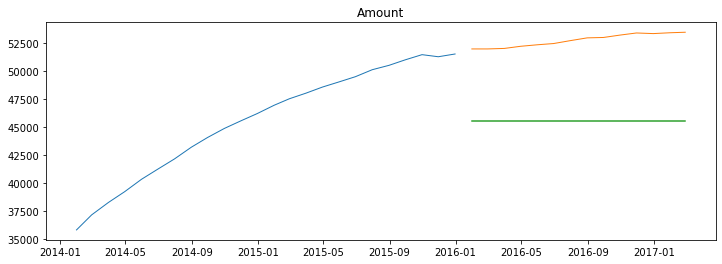

In [48]:
for col in train.columns:
    plot_and_eval(col)

In [49]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,Amount,1343.0
1,simple_average,Amount,7181.0


Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.


In [50]:


print(train['Amount'].rolling(5).mean())

Month_Invoiced
2014-01-31        NaN
2014-02-28        NaN
2014-03-31        NaN
2014-04-30        NaN
2014-05-31    38189.0
2014-06-30    39270.0
2014-07-31    40266.0
2014-08-31    41249.0
2014-09-30    42213.0
2014-10-31    43118.0
2014-11-30    43976.0
2014-12-31    44784.0
2015-01-31    45531.0
2015-02-28    46220.0
2015-03-31    46849.0
2015-04-30    47452.0
2015-05-31    48015.0
2015-06-30    48523.0
2015-07-31    49040.0
2015-08-31    49534.0
2015-09-30    50019.0
2015-10-31    50503.0
2015-11-30    50858.0
2015-12-31    51138.0
Freq: M, Name: Amount, dtype: float64


In [51]:
period=5
rolling_avg = train['Amount'].rolling(period).mean()[-1]

In [52]:
yhat_df = make_predictions(rolling_avg)
yhat_df.head()

,Amount
Month_Invoiced,
2016-01-31,51138.0
2016-02-29,51138.0
2016-03-31,51138.0
2016-04-30,51138.0
2016-05-31,51138.0


Amount -- RMSE: 1684


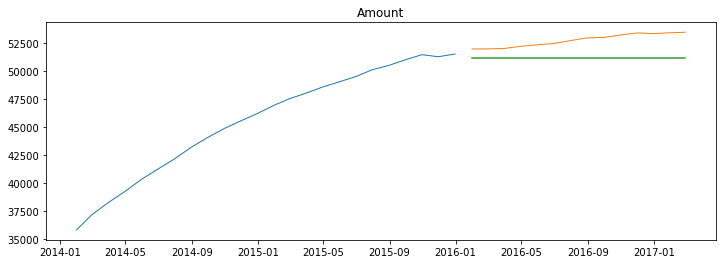

In [53]:
for col in train.columns:
    plot_and_eval(col)

In [54]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'moving_avg', 
                            target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,Amount,1343.0
1,simple_average,Amount,7181.0
2,moving_avg,Amount,1684.0


periods = [4, 12, 26, 52, 104]

for p in periods: 
    rolling_sales = round(train['sales_total'].rolling(p).mean()[-1], 2)
    rolling_quantity = round(train['quantity'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(rolling_sales, rolling_quantity)
    model_type = str(p) + '_day_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

### Holt's Linear Trend


Exponential smoothing applied to both the average and the trend (slope).  

- $\alpha$ / smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.   
- $\beta$ / smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values. 



**Seasonal Decomposition**

#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us.

In [55]:
col = 'Amount' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [56]:
# fit the holt's object
model = model.fit(optimized=True)

In [57]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [58]:
# doing this in a loop for each column
for col in train.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

col = 'sales_total'
- create the Holt object 
model = Holt(train[col], exponential=False, damped=True)
- fit the model 
model = model.fit(optimized=True)
- make predictions for each date in validate 
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])
- add predictions to yhat_df
yhat_df[col] = round(yhat_items, 2)

Amount -- RMSE: 456


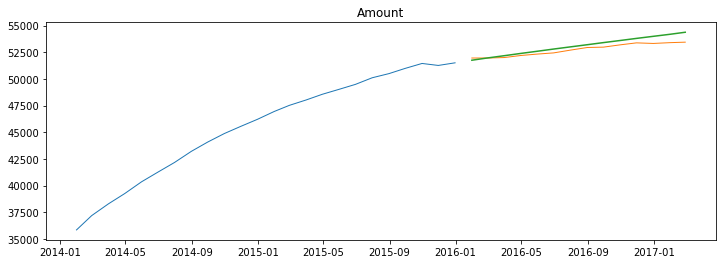

In [59]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [60]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [61]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
3,holts_optimized,Amount,456.0
0,last_observed_value,Amount,1343.0
2,moving_avg,Amount,1684.0
1,simple_average,Amount,7181.0
